In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [2]:
# path to json
DATA_PATH = "data_10.json"

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(9996, 130, 13)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# build network topology
#ann 
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 6ms/step - loss: 10.3345 - accuracy: 0.3277 - val_loss: 5.7379 - val_accuracy: 0.3701
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 4.3105 - accuracy: 0.4425 - val_loss: 4.3265 - val_accuracy: 0.4278
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 2.8897 - accuracy: 0.4941 - val_loss: 3.6735 - val_accuracy: 0.4248
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 2.1623 - accuracy: 0.5498 - val_loss: 3.2588 - val_accuracy: 0.4532
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 1.6982 - accuracy: 0.6053 - val_loss: 3.1317 - val_accuracy: 0.4575
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 1.3430 - accuracy: 0.6551 - val_loss: 2.9031 - val_accuracy: 0.4672
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 1.1274 - accuracy: 0.6884 - val_loss: 2.8733 - val_accuracy: 0.4818
Epoch

In [14]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

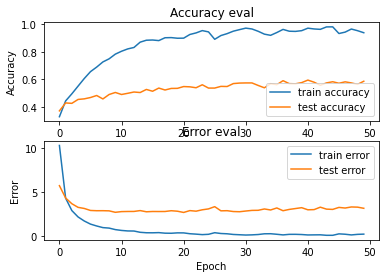

In [15]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [16]:
#ann model
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 2s 9ms/step - loss: 24.0043 - accuracy: 0.1641 - val_loss: 3.4886 - val_accuracy: 0.2387
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 6.9727 - accuracy: 0.1774 - val_loss: 3.3857 - val_accuracy: 0.1771
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 4.6528 - accuracy: 0.1662 - val_loss: 3.4444 - val_accuracy: 0.1497
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 4.0459 - accuracy: 0.1661 - val_loss: 3.4394 - val_accuracy: 0.1454
Epoch 5/100
219/219 [==============================] - 2s 8ms/step - loss: 3.7434 - accuracy: 0.1639 - val_loss: 3.4270 - val_accuracy: 0.1504
Epoch 6/100
219/219 [==============================] - 2s 8ms/step - loss: 3.6473 - accuracy: 0.1549 - val_loss: 3.3798 - val_accuracy: 0.1627
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 3.5631 - accuracy: 0.1765 - val_loss: 3.3733 - val_accuracy: 0.171

Epoch 58/100
219/219 [==============================] - 2s 9ms/step - loss: 1.7878 - accuracy: 0.5255 - val_loss: 2.0095 - val_accuracy: 0.4832
Epoch 59/100
219/219 [==============================] - 2s 9ms/step - loss: 1.7631 - accuracy: 0.5305 - val_loss: 2.0136 - val_accuracy: 0.4912
Epoch 60/100
219/219 [==============================] - 2s 9ms/step - loss: 1.7450 - accuracy: 0.5445 - val_loss: 1.9689 - val_accuracy: 0.5012
Epoch 61/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6980 - accuracy: 0.5489 - val_loss: 1.9731 - val_accuracy: 0.5102
Epoch 62/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6906 - accuracy: 0.5534 - val_loss: 1.9887 - val_accuracy: 0.5022
Epoch 63/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6524 - accuracy: 0.5631 - val_loss: 1.9157 - val_accuracy: 0.5118
Epoch 64/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6403 - accuracy: 0.5680 - val_loss: 1.9170 - val_accuracy:

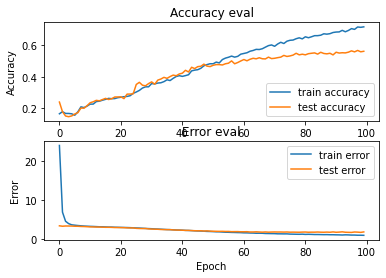

In [19]:
plot_history(history)

In [20]:
test_loss, test_acc = model_regularized.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

94/94 - 0s - loss: 1.9316 - accuracy: 0.5629

Test accuracy: 0.5628542900085449


In [21]:
model_regularized.save("Music_Genre_10_CNN")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Music_Genre_10_CNN\assets


In [22]:
model_regularized.save("Music_Genre_10_CNN.h5")

In [23]:
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

In [24]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [25]:
X_to_predict.shape

(130, 13)

In [26]:
print("Real Genre:", y_to_predict)

Real Genre: 5


In [27]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...]

In [28]:
X_to_predict.shape

(1, 130, 13)

In [29]:
prediction = model_regularized.predict(X_to_predict)

In [30]:
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 5


In [31]:
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_regularized.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 7
Predicted Genre: 9


In [32]:
len(X_test)

2999

In [33]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_regularized.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 1
Predicted Genre: 1

Real Genre: 7
Predicted Genre: 7

Real Genre: 0
Predicted Genre: 9

Real Genre: 0
Predicted Genre: 9

Real Genre: 6
Predicted Genre: 6

Real Genre: 4
Predicted Genre: 8

Real Genre: 6
Predicted Genre: 3

Real Genre: 5
Predicted Genre: 1

Real Genre: 0
Predicted Genre: 5

Real Genre: 8
Predicted Genre: 8


In [34]:
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc


In [35]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [37]:
new_input_mfcc = process_input("sample3.wav", 30)

In [38]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [40]:
prediction = model_regularized.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: classical


In [41]:
new_input_mfcc = process_input("hiphopdiff.mp3", 30)

In [42]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [43]:
prediction = model_regularized.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: country


In [44]:
new_input_mfcc = process_input("adam.mp3", 30)

C:\Users\KIIT\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [45]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [46]:
prediction = model_regularized.predict(X_to_predict)
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: country
